In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from PIL import Image

In [3]:
data_dir = r'C:\Users\DONG PHUONG\Desktop\DATN_NDLC_Final\lacay\rice_leaf_diseases'

In [4]:
data_dir

'C:\\Users\\DONG PHUONG\\Desktop\\DATN_NDLC_Final\\lacay\\rice_leaf_diseases'

In [5]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/DONG PHUONG/Desktop/DATN_NDLC_Final/lacay/rice_leaf_diseases')

In [6]:
list(data_dir.glob("*DSC*.jpg"))

[]

In [7]:
bacteria=list(data_dir.glob("Bacterial leaf blight/*"))
len(bacteria)

40

In [8]:
x = list(data_dir.glob("Bacterial leaf blight/DSC_0379.JPG"))
len(x)

1

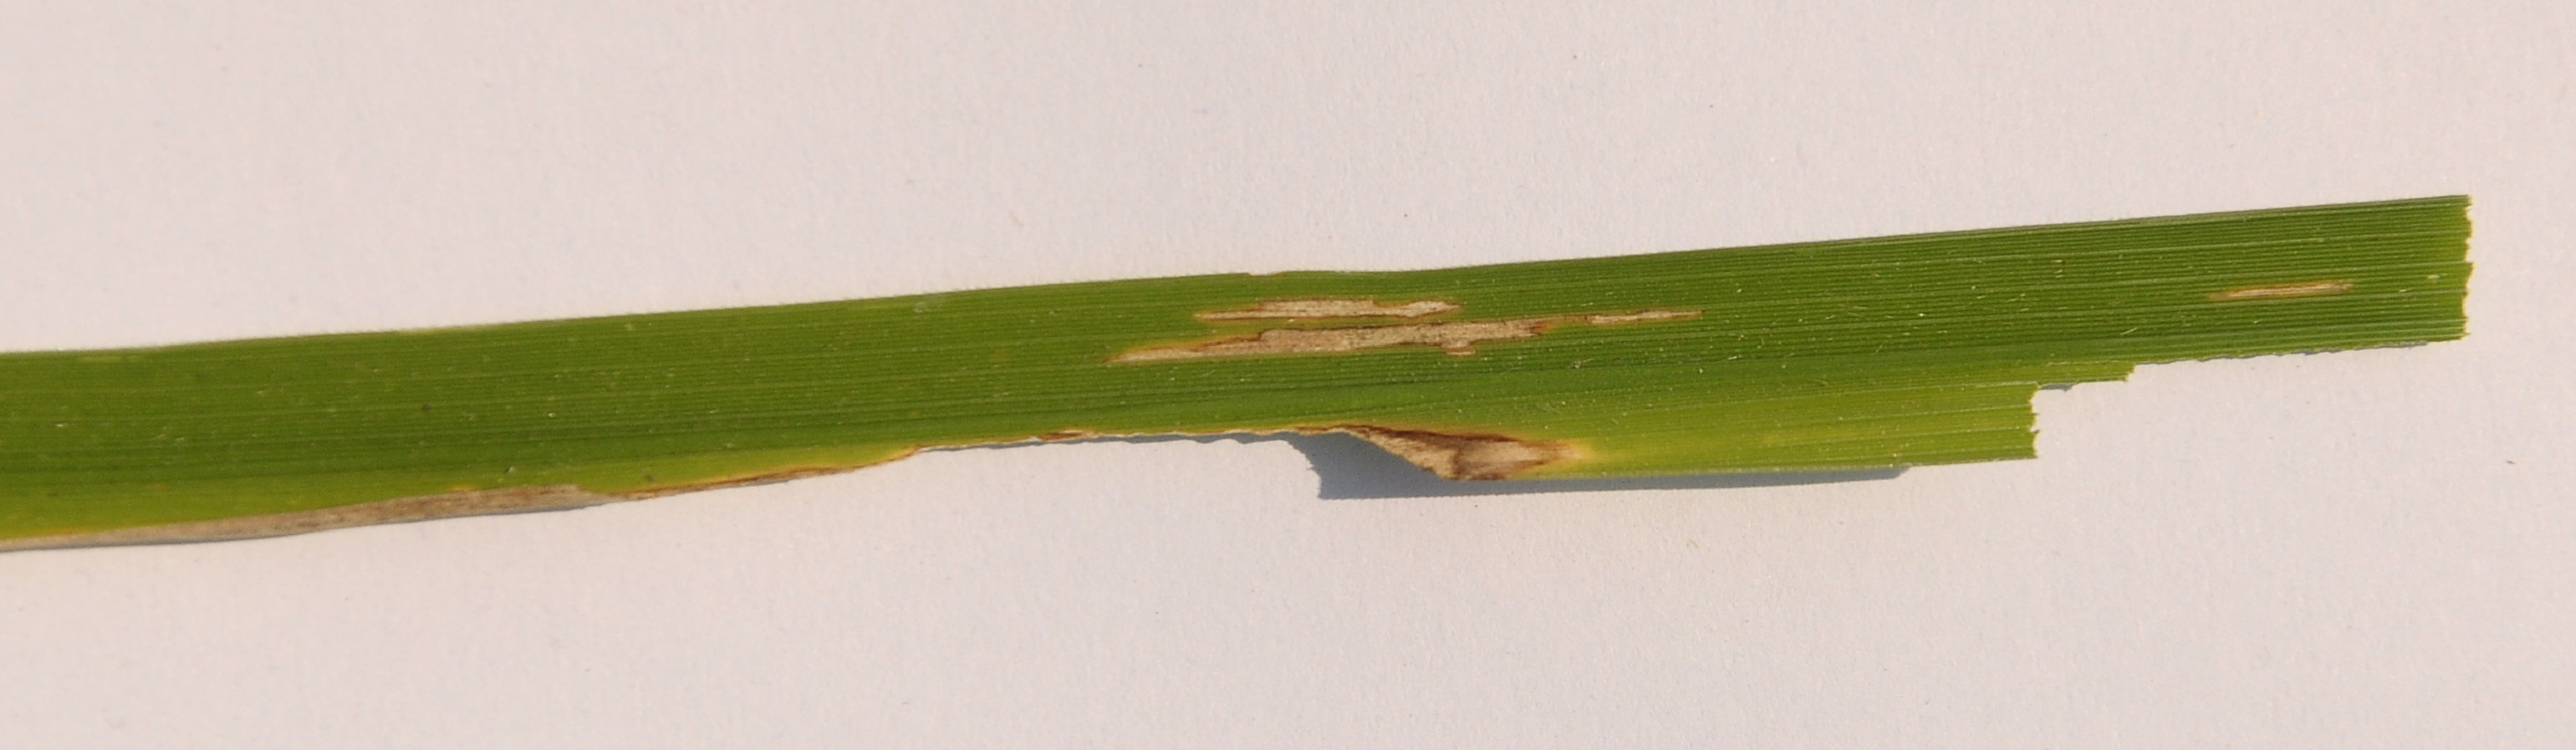

In [9]:
PIL.Image.open(str(bacteria[0]))

In [10]:
brown=list(data_dir.glob("Brown spot/*"))
len(brown)

40

In [11]:
# contains all the images of a specific directory to the key name of the directory
dict={"bacteria":list(data_dir.glob("Bacterial leaf blight/*")),"brown":list(data_dir.glob("Brown spot/*")),"smut":list(data_dir.glob("Leaf smut/*")),"healthy":list(data_dir.glob("Healthy/*"))}

In [12]:
dict

{'bacteria': [WindowsPath('C:/Users/DONG PHUONG/Desktop/DATN_NDLC_Final/lacay/rice_leaf_diseases/Bacterial leaf blight/DSC_0365.JPG'),
  WindowsPath('C:/Users/DONG PHUONG/Desktop/DATN_NDLC_Final/lacay/rice_leaf_diseases/Bacterial leaf blight/DSC_0366.jpg'),
  WindowsPath('C:/Users/DONG PHUONG/Desktop/DATN_NDLC_Final/lacay/rice_leaf_diseases/Bacterial leaf blight/DSC_0367.JPG'),
  WindowsPath('C:/Users/DONG PHUONG/Desktop/DATN_NDLC_Final/lacay/rice_leaf_diseases/Bacterial leaf blight/DSC_0370.jpg'),
  WindowsPath('C:/Users/DONG PHUONG/Desktop/DATN_NDLC_Final/lacay/rice_leaf_diseases/Bacterial leaf blight/DSC_0372.JPG'),
  WindowsPath('C:/Users/DONG PHUONG/Desktop/DATN_NDLC_Final/lacay/rice_leaf_diseases/Bacterial leaf blight/DSC_0373.JPG'),
  WindowsPath('C:/Users/DONG PHUONG/Desktop/DATN_NDLC_Final/lacay/rice_leaf_diseases/Bacterial leaf blight/DSC_0374.JPG'),
  WindowsPath('C:/Users/DONG PHUONG/Desktop/DATN_NDLC_Final/lacay/rice_leaf_diseases/Bacterial leaf blight/DSC_0375.JPG'),
  Wi

In [13]:
labels_dict = {
    'bacteria': 0,
    'brown': 1,
    'smut': 2,
    'healthy': 3,
   
}

In [14]:
str(dict["smut"][0])

'C:\\Users\\DONG PHUONG\\Desktop\\DATN_NDLC_Final\\lacay\\rice_leaf_diseases\\Leaf smut\\DSC_0293.JPG'

In [15]:
labels_dict["smut"]

2

Image processing starts from here

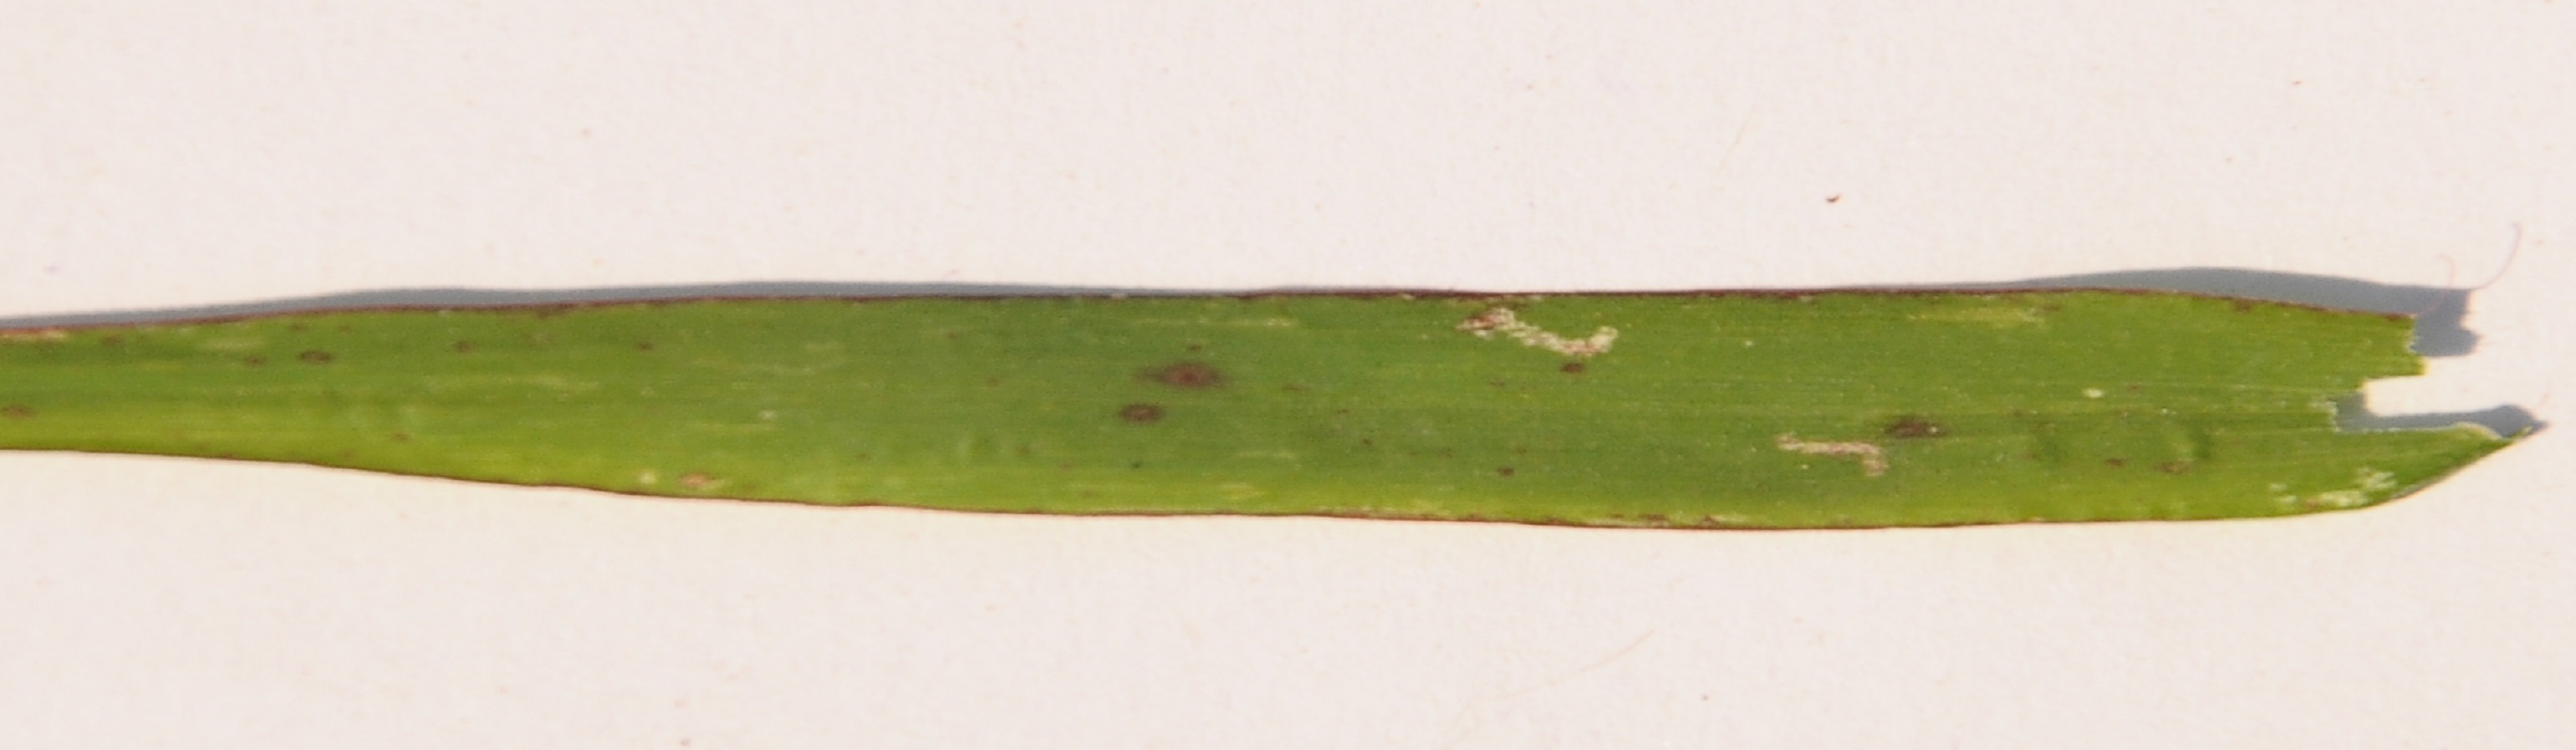

In [16]:
PIL.Image.open(str(dict["smut"][0]))

In [17]:
img=cv2.imread(str((dict["smut"][0])))
               


In [18]:
str(dict["healthy"][0])

'C:\\Users\\DONG PHUONG\\Desktop\\DATN_NDLC_Final\\lacay\\rice_leaf_diseases\\Healthy\\DCS_0932.jpg'

In [19]:
labels_dict["healthy"]

3

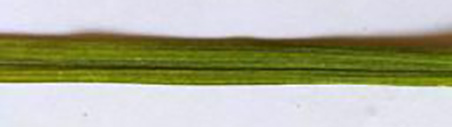

In [19]:
PIL.Image.open(str(dict["healthy"][0]))

In [20]:
img=cv2.imread(str((dict["healthy"][0])))

In [22]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [21]:
X, y = [], []

for name, images in dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(labels_dict[name])

In [22]:
y[:5]

[0, 0, 0, 0, 0]

In [23]:
X = np.array(X)
y = np.array(y)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)



In [25]:
len(X_test)

40

In [28]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255
print(X_train_scaled[0])
kich_thuoc_anh = X_train_scaled.shape
print(f"Kích thước của ảnh sau khi chuẩn hóa là: {kich_thuoc_anh[1]}x{kich_thuoc_anh[2]}")

[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.34509804 0.73333333 0.70196078]
  [0.29803922 0.74901961 0.68235294]
  [0.2745098  0.72156863 0.65490196]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]


In [29]:
num_classes = 4
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)




Epoch 1/30


4/4 [==============================] - 3s 266ms/step - loss: 2.3663 - accuracy: 0.2333
Epoch 2/30
4/4 [==============================] - 1s 221ms/step - loss: 1.4274 - accuracy: 0.3083
Epoch 3/30
4/4 [==============================] - 1s 256ms/step - loss: 1.3546 - accuracy: 0.3917
Epoch 4/30
4/4 [==============================] - 1s 201ms/step - loss: 1.2430 - accuracy: 0.5083
Epoch 5/30
4/4 [==============================] - 1s 216ms/step - loss: 1.1327 - accuracy: 0.5583
Epoch 6/30
4/4 [==============================] - 1s 218ms/step - loss: 1.0247 - accuracy: 0.5250
Epoch 7/30
4/4 [==============================] - 1s 200ms/step - loss: 0.8413 - accuracy: 0.6500
Epoch 8/30
4/4 [==============================] - 1s 190ms/step - loss: 0.7513 - accuracy: 0.7417
Epoch 9/30
4/4 [==============================] - 1s 190ms/step - loss: 0.6511 - accuracy: 0.7500
Epoch 10/30
4/4 [==============================] - 1s 207ms/step - loss: 0.5416 - accuracy: 0.7917
Epoch 11/30
4/

In [30]:
model.evaluate(X_test_scaled,y_test)

2/2 [==============================] - 0s 16ms/step - loss: 0.5861 - accuracy: 0.8750


[0.586145281791687, 0.875]

In [31]:
predictions = model.predict(X_test_scaled)
predictions

2/2 [==============================] - 0s 31ms/step


array([[ -4.158033  ,  -0.73756903,  14.48272   ,   6.013202  ],
       [  4.803648  ,  -2.7768168 ,   2.863804  ,   2.981572  ],
       [ -2.6015892 ,  -1.1972178 ,   3.6458933 ,   7.9480247 ],
       [  7.9618692 ,   0.17316824,  -1.8394004 ,  -1.9530019 ],
       [ -2.3002255 ,  15.811695  ,  10.817958  , -11.032166  ],
       [ -2.1595058 ,   2.330088  ,   6.742242  ,   0.53302836],
       [ -4.6589804 ,   1.5747443 ,  -0.6009724 ,  11.588725  ],
       [  4.1837754 ,   6.1315455 ,  -0.07150953,  -5.7953205 ],
       [ -0.5093213 ,   2.9037914 ,   7.071852  ,  -1.7816318 ],
       [ -1.899409  ,   2.5552945 ,   6.1992817 ,   0.8797368 ],
       [ -2.2812848 ,  -3.156543  ,   0.54576486,  12.149923  ],
       [ -7.2745056 ,   5.395135  ,   8.757385  ,   1.2404125 ],
       [  4.7500434 ,   2.4917283 ,  -0.48696655,  -1.5808088 ],
       [ -5.217658  ,   2.5004506 ,   3.4543507 ,   7.7012978 ],
       [ -0.3215861 ,  10.548501  ,  22.478144  , -11.2404995 ],
       [ -1.928318  ,   4

In [32]:
score = tf.nn.softmax(predictions[0])
print(score)

tf.Tensor([8.0229245e-09 2.4536985e-07 9.9979001e-01 2.0972178e-04], shape=(4,), dtype=float32)


In [33]:
np.argmax(score)

2

In [34]:
y_test[0]

2

In [35]:
data_augmentation = keras.Sequential(
  [

    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomFlip("horizontal")
  ]
)

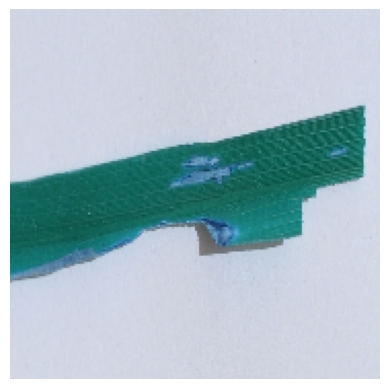

In [36]:
plt.axis('off')
plt.imshow(X[0])


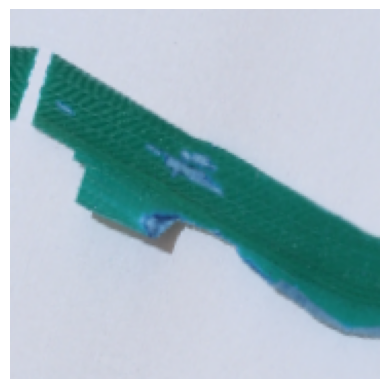

In [37]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

Epoch 1/40
3/3 [==============================] - 4s 481ms/step - loss: 1.4877 - accuracy: 0.2917 - val_loss: 1.3502 - val_accuracy: 0.2917
Epoch 2/40
3/3 [==============================] - 1s 411ms/step - loss: 1.3643 - accuracy: 0.3333 - val_loss: 1.3231 - val_accuracy: 0.5000
Epoch 3/40
3/3 [==============================] - 1s 370ms/step - loss: 1.2479 - accuracy: 0.3854 - val_loss: 1.3871 - val_accuracy: 0.3750
Epoch 4/40
3/3 [==============================] - 1s 302ms/step - loss: 1.1225 - accuracy: 0.5312 - val_loss: 1.3587 - val_accuracy: 0.3750
Epoch 5/40
3/3 [==============================] - 1s 293ms/step - loss: 0.9825 - accuracy: 0.6042 - val_loss: 1.3869 - val_accuracy: 0.4583
Epoch 6/40
3/3 [==============================] - 1s 283ms/step - loss: 0.9274 - accuracy: 0.5938 - val_loss: 1.4698 - val_accuracy: 0.4167
Epoch 7/40
3/3 [==============================] - 1s 351ms/step - loss: 0.8660 - accuracy: 0.6458 - val_loss: 1.3317 - val_accuracy: 0.4167
Epoch 8/40
3/3 [====

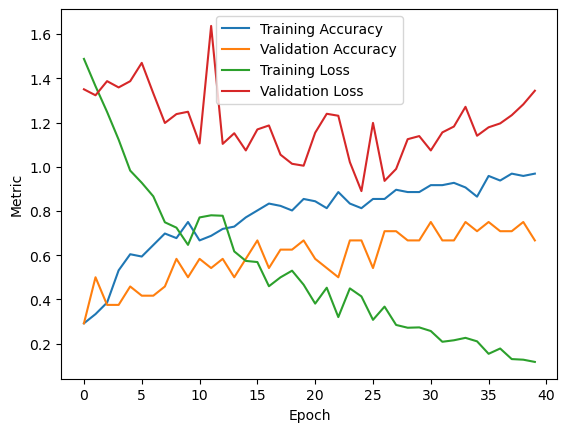

In [38]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import matplotlib.pyplot as plt



# Model và biến đồ chính xác
num_classes = 4
model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Lưu đồ chính xác và loss trong quá trình huấn luyện
history = model.fit(X_train_scaled, y_train, epochs=40, validation_split=0.2)

# Hiển thị đồ thị độ chính xác và loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()
plt.show()

   

In [39]:
model.evaluate(X_test_scaled,y_test)
score = tf.nn.softmax(predictions[0])
print(score)

2/2 [==============================] - 0s 34ms/step - loss: 0.4871 - accuracy: 0.8250


[0.4871078431606293, 0.824999988079071]

In [40]:
from tensorflow.keras.models import load_model

# Lưu model dưới định dạng .h5
model.save('model.h5')


c:\Users\DONG PHUONG\anaconda3\envs\notebook\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
